# Analisi del file CSV character_anime_works

## Analisi
Analizzando il file notiamo come contenga un'informazione interessante; ci permette di sapere se un personaggio è protagonista o comparsa in un determinato anime.
Inoltre ci permette, conoscendo anime_mal_id di raggruppare tutti i personaggi di quel determinato anime, come esempio mostreremo tutti i protagonisti dell'anime 467.

In [64]:
import pandas as pd
%pip install matplotlib
%pip install geopandas
import matplotlib.pyplot as plt
characterAW_df = pd.read_csv('character_anime_works.csv')
roleM = characterAW_df[(characterAW_df['role'] == 'Main') & (characterAW_df['anime_mal_id'] == 467)]
roleM

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,anime_mal_id,character_mal_id,character_name,role
111174,467,2677,"Aramaki, Daisuke",Main
111175,467,2653,Batou,Main
111176,467,1795,"Kusanagi, Motoko",Main
111177,467,2654,Togusa,Main


Il risultato di questa analisi è molto interessante perchè ci permette di sapere che l'anime identificato con il numero 467 ha 4 protagonisti e di sapere i rispettivi nomi, tutto ciò diventa ancora più interessante una volta associcato un nome all'id dell'anime 467.
Nel prossimo step analizzeremo invece i dati del file in maniera generale per mostrare eventuali dati anomali o statistiche interessanti.

## Ma gli anime sono composti da più protagonisti o comparse?

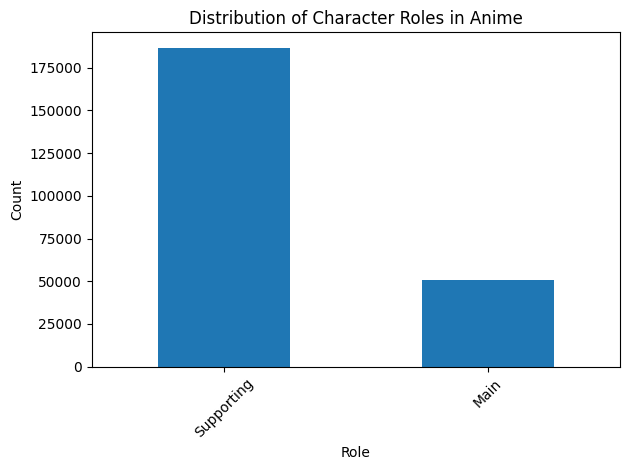

In [2]:

characterAW_df['role'].value_counts().plot(kind='bar')
characterAW_df = characterAW_df.drop_duplicates()

plt.title('Distribution of Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come possiamo vedere il numero di personaggi 'supporting' spera di ben due volte il numero di protagonisti.

# Analisi del file CSV character_nickname

## Analisi
Analizzando il file notiamo come contenga un nickname per ogni personaggio del mondo anime.

In [3]:
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()

,character_mal_id,nickname
0,280205,Hikaruko
1,280129,Hinacchi
2,280127,Bertha Willis
3,280066,Jimmy
4,280059,Full Body Red Square


Questo csv mi sembra abbastanza inutile : )

# Analisi del file CSV character

Questo file contiene per ogni character_mal_id il suo nome, un bit favorites, impostato a 0 o 1, per alcuni è presente anche una descrizione.
Sarebbe interessante capire quanti dei protagonisti sono anche tra i personaggi preferiti e se hanno tutti una descrizione.

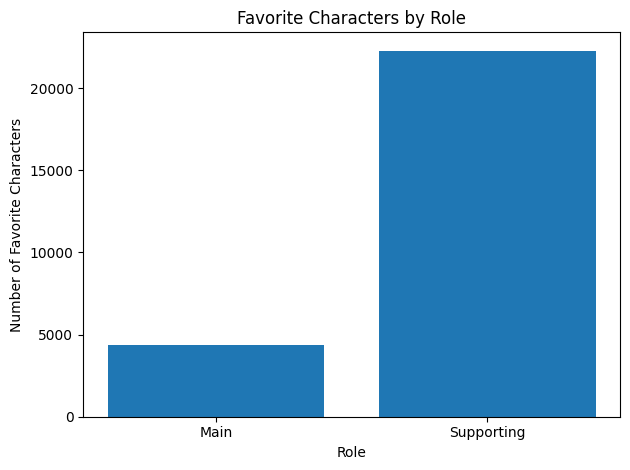

In [25]:
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop_duplicates()
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df = character_df.dropna(subset=['favorites'])
characterAW_df = characterAW_df.rename(columns={'character_id': 'character_mal_id'})
preferiti = character_df[character_df['favorites'] == 1]

roleM = characterAW_df[characterAW_df['role'] == 'Main']
roleS = characterAW_df[characterAW_df['role'] == 'Supporting']
preferitiProtagonisti = pd.merge(preferiti, roleM, on='character_mal_id', how='inner')
preferitiComparse = pd.merge(preferiti, roleS, on='character_mal_id', how='inner')

plt.title('Favorite Characters by Role')
plt.xlabel('Role')
plt.ylabel('Number of Favorite Characters')
plt.bar(['Main', 'Supporting'], [len(preferitiProtagonisti), len(preferitiComparse)])
plt.tight_layout()
plt.show()


Questo grafico è molto interessante perchè potremmo pensare che nel mondo anime i personaagi preferiti siano i protagonisti e questo è in parte vero oltre che un ragiunamento perfettamente logico, i dati però ci mostrano che sono apprezzati allo stesso modo anche i personaggi secondari.
Non sto a riportare i numeri ma avendo fatto i conti riporto un dato molto interessante: i protagonisti del mondo anime rientrano nei personaggi preferiti per il 10% e il dato e molto simile, 9-11% per i personaggi secondari.
In conclusione possiamo dire che esiste un apprezzamento quasi identico tra main character e supporting character e questo lo sappiamo grazie alla percentuale di gradimento che è molto simile tra le due categorie. 

# Analisi del file CSV favs

Dopo aver analizzato i file character passiamo a un file che contiene non più dati sui personaggi ma dati sugli utenti che consumano contenuti riguardanti il mondo anime.

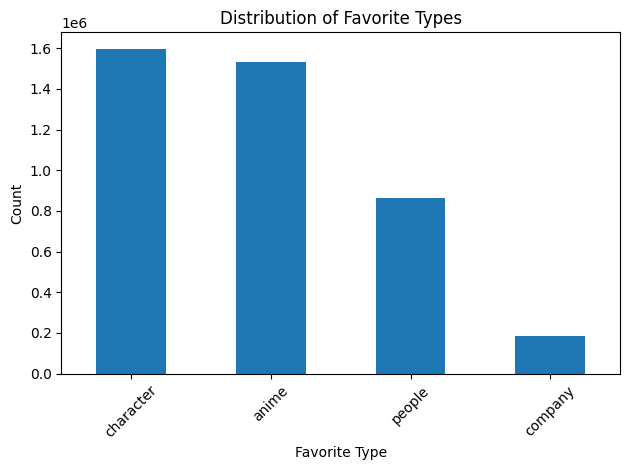

In [ ]:
favs = pd.read_csv('favs.csv')
favs = favs.drop_duplicates()
favs = favs.dropna()

favs['fav_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Favorite Types')
plt.xlabel('Favorite Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grazie ai dati contenuti in questo file CSV possiamo vedere come gli utenti abbiano tra i loro preferiti per la maggior parte i personaggi ancora più degli anime in se anche se di poco, questi dati ci mostrano quindi come il pubblico si affezioni particolarmente ai personaggi delle proprie serie preferite.
## Curiosità
Vediamo ora per curiosità gli stessi dati ma di un utente casuale, come per esempio l'utente 'Karinta', rispetterà la media e avrà principalmente personaggi tra i preferiti?

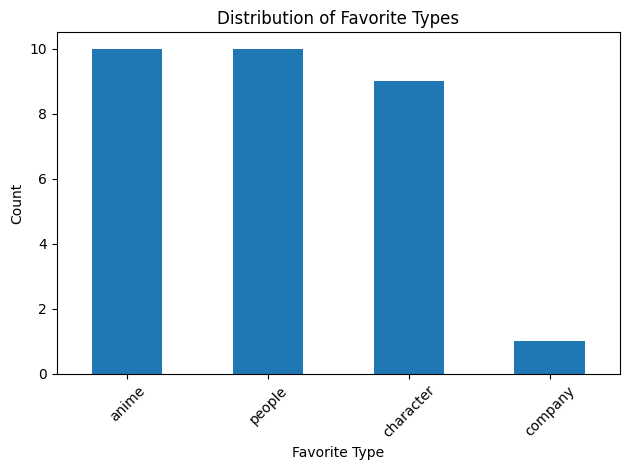

In [44]:
utente = favs[favs['username'] == 'Karinta']
utente['fav_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Favorite Types')
plt.xlabel('Favorite Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come possiamo vedere è bastato prendere un utente a caso per ritrovare anime e character tra i preferiti, in questo caso abbiamo un utentr anche molto interessato alle persone che lavorano alla realizzazione di questi prodotti, ma si tratta probabilmente di un caso più di niscchia in quanto l'interesse è in media nettamente più basso.

# Analisi del file CSV profiles
## Questo è probabilmente il file più interessante tra quelli analizzati fin ora!
In questo file troviamo informazioni concrete sugli utenti che consumano contenuti del mondo anime e come prima domanda ci chiediamo ma sono più maschi o femmine ad appassionarsi a questo mondo?

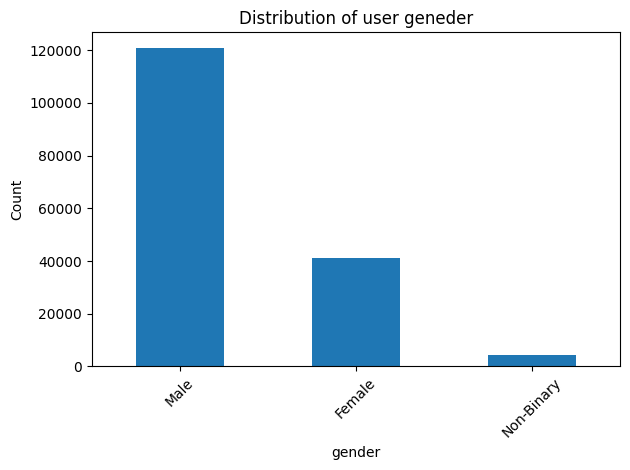

In [48]:
profile = pd.read_csv('profiles.csv')
genere = profile
genere = genere.drop(columns=['birthday', 'location', 'joined', 'watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'])
genere = genere.drop_duplicates()
genere = genere.dropna()
genere['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of user geneder')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Come mi aspettavo il grafico ci mostra che gli uomini sono i più appassionati del mondo anime e di gan lunga anche!
Ora che sappiamo questo viene ovvia la curiosità di sapere l'età di questi utenti, separando l'età degli utenti uomini dall'età degli utenti donna.
## Distribuzione dell'età?

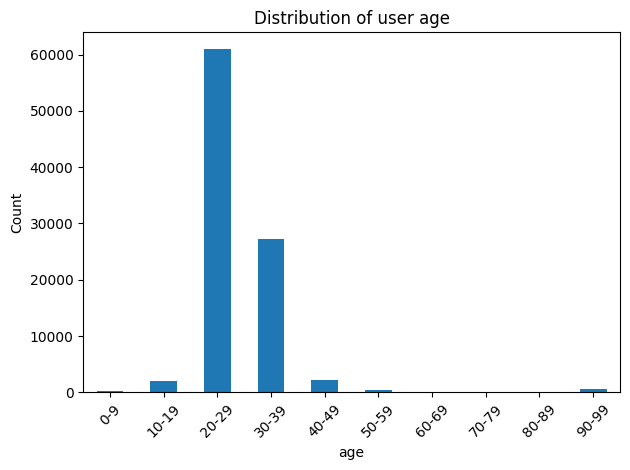

In [57]:
from datetime import datetime

età = profile
età = età.drop(columns = ['gender', 'location', 'joined', 'watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'])
età = età.drop_duplicates()

# Extract 4-digit year from 'birthday' strings (some entries lack year e.g. "Aug 4")
età['birth_year'] = età['birthday'].astype(str).str.extract(r'(\d{4})')[0].astype(float)

# Keep only rows with a valid year and compute age
età = età.dropna(subset=['birth_year']).copy()
current_year = datetime.now().year
età['age'] = current_year - età['birth_year']

# Use the existing bins and labels (they are defined earlier in the notebook)
età['age_group'] = pd.cut(età['age'], bins=bins, labels=labels, right=False)

età['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of user age')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Questo grafico è molto interessante perchè ha una gaussiana che parte dai 10 e va fino ai 60 anni con picco massimo sui 30 per cui possiamo dire che la maggior parte degli appassionati di anime ha tra i 20 e i 40 anni, il grafico però ci mostra anche la presenza di utenti con età superiore ai 90 anni, è quindi necessario analizzare quei dati specifici per capire se si tratta di un errore o se effettivamente esistono utenti registrati di quell'età.
## Utenti over 90???

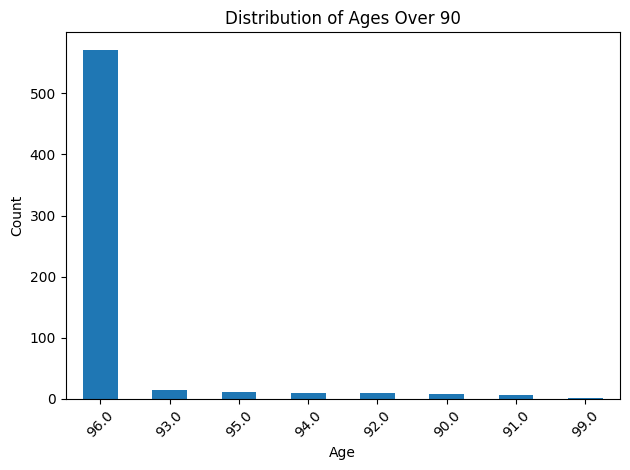

In [61]:
over90 = età[età['age'] >= 90]
over90 = over90.dropna(subset=['age', 'age_group'])

over90['age'].sort_index().value_counts().plot(kind='bar')
plt.title('Distribution of Ages Over 90')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Questo dato è molto strano e probabilmente riguarda utenti che hanno dichiarato età false, non possiamo saperlo con certezza ma la differenza così alta tra utenti di 96 anni e tutti gli altri compresi nel renge ce lo suggerisce.

# Qali sono stati o sono gli anno d'oro per gli anime
Analizzeremo in quali anni il numero di iscrizioni di utenti è stato maggiore.

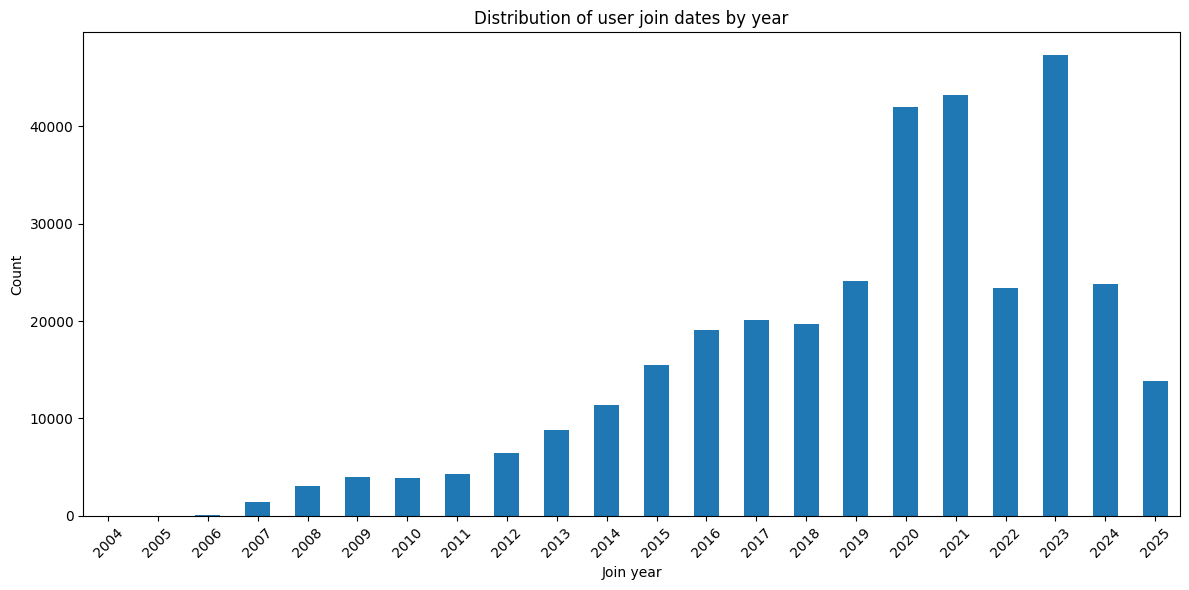

In [94]:
iscrizioni = profile.drop(columns=['gender', 'birthday', 'location', 'watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'])
iscrizioni = iscrizioni.drop_duplicates()
iscrizioni = iscrizioni.dropna()

# Convert 'joined' to datetime and extract year
iscrizioni['joined_dt'] = pd.to_datetime(iscrizioni['joined'], errors='coerce')
iscrizioni = iscrizioni.dropna(subset=['joined_dt']).copy()
iscrizioni['join_year'] = iscrizioni['joined_dt'].dt.year.astype(int)

# Plot distribution by year
year_counts = iscrizioni['join_year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of user join dates by year')
plt.xlabel('Join year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Il dato che ci viene mostrato ha perfettamente senso perchè ci molstra come dalla nascita delle piattaforme sulle quali iscriversi per vedere contenuti multimediali il trend è stato in crescita costante per i primi 10 anni per poi assestarsi su valori abbastanza costanti da li in poi.
Evidenziamo però 3 accezzioni, due riguardanti i dati di 2020 e 21 in cui un aumento così importante di iscrizioni è probabilmente causato dal Covid-19, questa è una diretta causa infatti dell'aumento di consumo di contenuti multimediali da parte degli utenti.
La terza eccezzione invece riguarda l'anno 2023 che presente anche il numero massimo di iscrizioni mai raggiunto, di qeusto sinceramente non so cosa dire sarà uscita una serie famosa.

# Ma vogliamo sapere nel mondo dove sono più visti gli anime?
Grazie ai dati forniti nel file CSV è possibile generare una heat map che ce li mostri!

<Figure size 1600x1000 with 0 Axes>

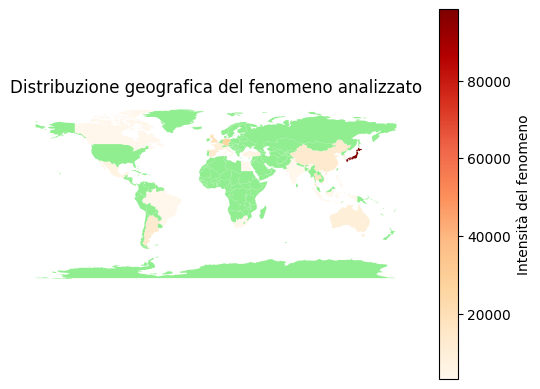

In [87]:
import geopandas as gpd

GeoJSON = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(GeoJSON)

# Clean names
profile['location'] = profile['location'].astype(str).str.strip()
world['name'] = world['name'].str.strip()

# Aggregate counts of users per country and create the 'value' column
location_counts = profile['location'].value_counts().reset_index()
location_counts.columns = ['name', 'value']
location_counts['name'] = location_counts['name'].str.strip()

# Merge aggregated data (counts) into the GeoDataFrame
world_data = world.merge(location_counts, how='left', on='name')

plt.figure(figsize=(16,10))
ax = world_data.plot(
    column="value",
    cmap="OrRd",
    legend=True,
    legend_kwds={"label": "Intensità del fenomeno"},
    missing_kwds={
        "color": "lightgreen",
        "label": "Dati non disponibili"
    }
)

ax.set_title("Distribuzione geografica del fenomeno analizzato")
ax.set_axis_off()
plt.show()

Come possiamo vedere dalla mappa il giappone (patria degli anime) è il paese in cui ci sono più utenti in assoluto, altri paesi che vale la pena citare sono cina, australia, europa e alcune zone americane.